In [ ]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
!pip install kagglehub


In [ ]:
import kagglehub
import shutil
import os

# Download latest version of the dataset
path = kagglehub.dataset_download("gti-upm/leapgestrecog")

print("Path to dataset files:", path)

# Define your custom directory
custom_path = '/content/my_custom_data_directory'

# Create the custom directory if it does not exist
if not os.path.exists(custom_path):
    os.makedirs(custom_path)

# Dataset folder name
dataset_name = "leapGestRecog"

# Build the path to the dataset folder
dataset_path = os.path.join(path, dataset_name)

# Move the dataset to the custom path
if os.path.exists(dataset_path):
    shutil.move(dataset_path, custom_path)
    print(f"Dataset moved to: {custom_path}")
else:
    print(f"Dataset folder '{dataset_name}' not found at {path}")


100%|██████████| 2.13G/2.13G [00:22<00:00, 99.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1
Dataset moved to: /content/my_custom_data_directory


In [ ]:

os.listdir('/content/my_custom_data_directory/leapGestRecog')


['05', '04', '08', '01', '03', '07', '09', '06', '02', '00']

In [ ]:
import os
import cv2
import numpy as np

CATEGORIES = ["01_palm", '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
IMG_SIZE = 50

# Set the data path where the dataset is located
data_path = "/content/my_custom_data_directory/leapGestRecog"

image_data = []

# Iterate through the folders in the dataset directory
for dr in os.listdir(data_path):
    print(f"Processing folder: {dr}")  # Debugging print
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        category_path = os.path.join(data_path, dr, category)

        if os.path.exists(category_path):
            print(f"Processing category: {category}")  # Debugging print
            for img in os.listdir(category_path):
                img_path = os.path.join(category_path, img)

                try:
                    img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                    img_resized = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))

                    image_data.append([img_resized, class_index])

                except Exception as e:
                    print(f"Error processing {img_path}: {e}")  # Debugging print

if image_data:
    print("First image data entry:", image_data[0])
else:
    print("No image data found!")


Processing folder: 05
Processing category: 01_palm
Processing category: 02_l
Processing category: 03_fist
Processing category: 04_fist_moved
Processing category: 05_thumb
Processing category: 06_index
Processing category: 07_ok
Processing category: 08_palm_moved
Processing category: 09_c
Processing category: 10_down
Processing folder: 04
Processing category: 01_palm
Processing category: 02_l
Processing category: 03_fist
Processing category: 04_fist_moved
Processing category: 05_thumb
Processing category: 06_index
Processing category: 07_ok
Processing category: 08_palm_moved
Processing category: 09_c
Processing category: 10_down
Processing folder: 08
Processing category: 01_palm
Processing category: 02_l
Processing category: 03_fist
Processing category: 04_fist_moved
Processing category: 05_thumb
Processing category: 06_index
Processing category: 07_ok
Processing category: 08_palm_moved
Processing category: 09_c
Processing category: 10_down
Processing folder: 01
Processing category: 01_

In [ ]:
import random
random.shuffle(image_data)


In [ ]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [ ]:
label[:10]

[3, 1, 2, 0, 4, 4, 4, 1, 6, 7]

In [ ]:
import matplotlib.pyplot as plt


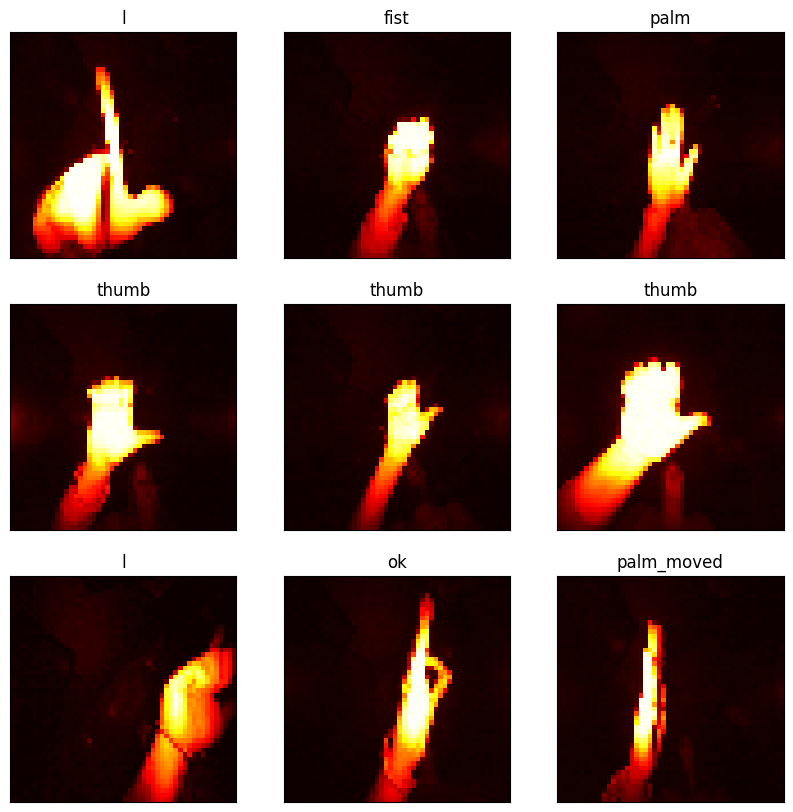

In [ ]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [ ]:
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [ ]:
label = keras.utils.to_categorical(label, num_classes=10)
label[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [ ]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 161s 360ms/step - accuracy: 0.6824 - loss: 0.9172 - val_accuracy: 0.9977 - val_loss: 0.0107
Epoch 2/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 145s 332ms/step - accuracy: 0.9926 - loss: 0.0222 - val_accuracy: 0.9990 - val_loss: 0.0022
Epoch 3/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 191s 307ms/step - accuracy: 0.9981 - loss: 0.0072 - val_accuracy: 0.9997 - val_loss: 0.0014
Epoch 4/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 146s 315ms/step - accuracy: 0.9985 - loss: 0.0046 - val_accuracy: 0.9993 - val_loss: 0.0032
Epoch 5/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 135s 309ms/step - accuracy: 0.9983 - loss: 0.0059 - val_accuracy: 0.9998 - val_loss: 0.0020
Epoch 6/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 144s 313ms/step - accuracy: 0.9996 - loss: 0.0030 - val_accuracy: 0.9993 - val_loss: 0.0035
Epoch 7/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 144s 318ms/step - accuracy: 0.9995 - loss: 0.0015 - val_accuracy: 0.9997 - val_loss: 0.0024


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 46, 46, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 46, 46, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 21, 21, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,338,582 (12.74 MB)

 Trainable params: 1,669,290 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,669,292 (6.37 MB)

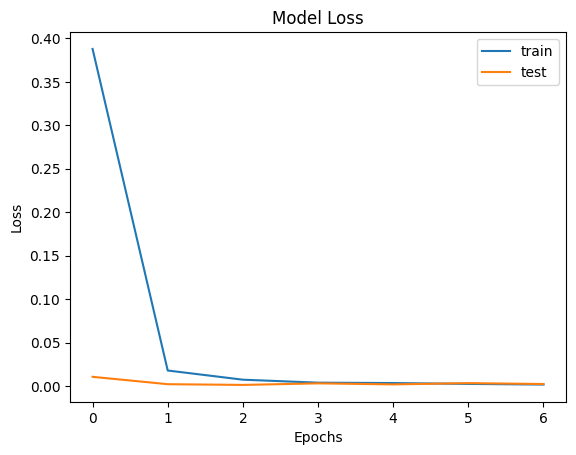

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

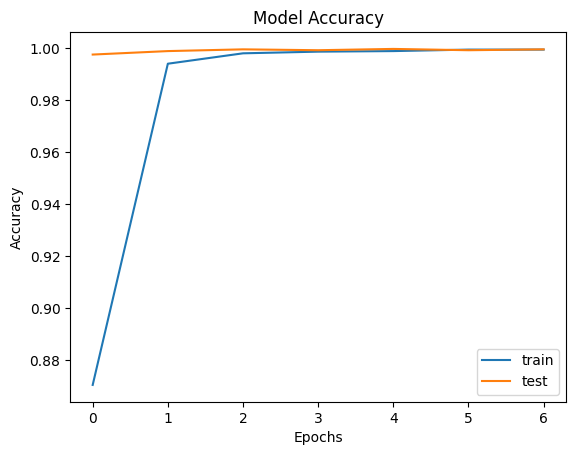

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9997 - loss: 0.0034
Test accuracy: 99.97%


188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step


[]

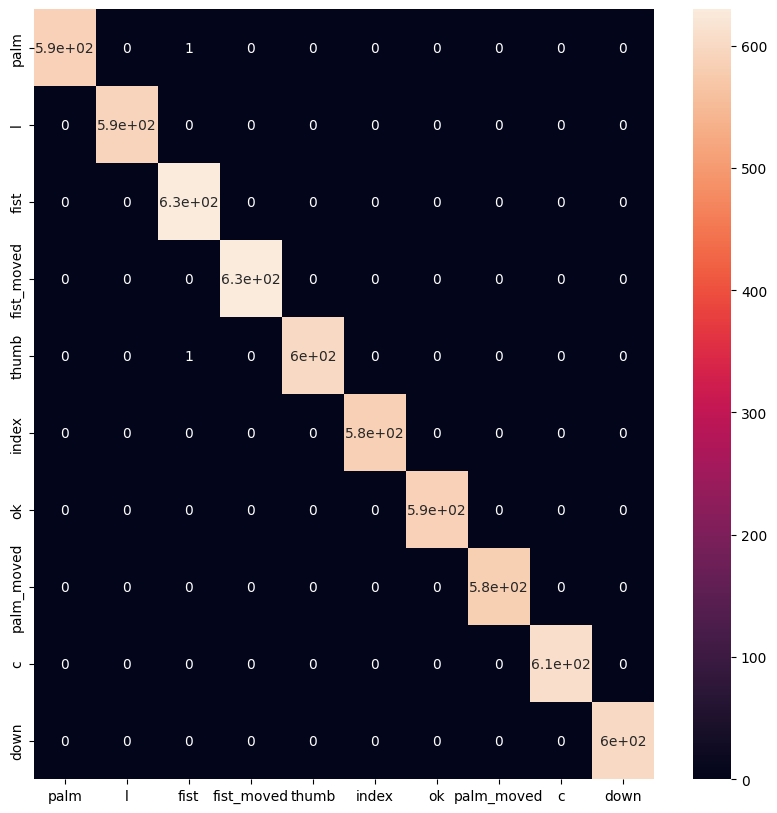

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()